EPOCHS:0
loss_val is:1.8843993357230029
loss_train is:1.869570468486162
EPOCHS:1
loss_val is:1.312378390912082
loss_train is:1.3092893026020624
EPOCHS:2
loss_val is:1.0972457096060915
loss_train is:1.100782661579591
EPOCHS:3
loss_val is:0.9923821309529688
loss_train is:0.9988918145616072
EPOCHS:4
loss_val is:0.9205853855677174
loss_train is:0.9283113377314851
EPOCHS:5
loss_val is:0.8639327028361131
loss_train is:0.8720606864602957
EPOCHS:6
loss_val is:0.8159798274167069
loss_train is:0.8239902910515561
EPOCHS:7
loss_val is:0.774922735771146
loss_train is:0.7828929395777481
EPOCHS:8
loss_val is:0.7394713433820448
loss_train is:0.7469840855194081
EPOCHS:9
loss_val is:0.7091544874923067
loss_train is:0.7162118679134052
EPOCHS:10
loss_val is:0.6822132033028113
loss_train is:0.689012975649267
EPOCHS:11
loss_val is:0.6586609847044103
loss_train is:0.6650276583542559
EPOCHS:12
loss_val is:0.6380880721069467
loss_train is:0.6442826517738423
EPOCHS:13
loss_val is:0.6199770141471809
loss_train i

EPOCHS:111
loss_val is:0.35875013300899733
loss_train is:0.36113234855151866
EPOCHS:112
loss_val is:0.35835763697620776
loss_train is:0.36070821759459265
EPOCHS:113
loss_val is:0.35793896457973456
loss_train is:0.36029724975591465
EPOCHS:114
loss_val is:0.3575593615359454
loss_train is:0.3599030945067989
EPOCHS:115
loss_val is:0.3571723536037199
loss_train is:0.359495895532693
EPOCHS:116
loss_val is:0.35678948633363944
loss_train is:0.3591114100387157
EPOCHS:117
loss_val is:0.35643236754621016
loss_train is:0.35873793443703317
EPOCHS:118
loss_val is:0.35604170725645623
loss_train is:0.3583731664562826
EPOCHS:119
loss_val is:0.35568606385617796
loss_train is:0.3580065784303702
EPOCHS:120
loss_val is:0.35534457878550707
loss_train is:0.3576429645800409
EPOCHS:121
loss_val is:0.3549703185950281
loss_train is:0.35730072918760103
EPOCHS:122
loss_val is:0.3546188103266778
loss_train is:0.3569447200774115
EPOCHS:123
loss_val is:0.3543248868593648
loss_train is:0.35659961095521725
EPOCHS:124
l

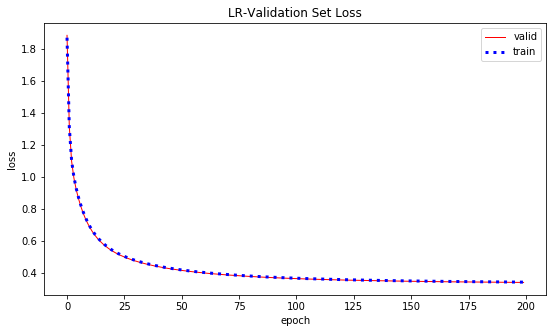

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# load dataset
X_train, Y_train = sklearn.datasets.load_svmlight_file('dataset/a9a', n_features=123)
X_val, Y_val = sklearn.datasets.load_svmlight_file('dataset/a9a.t', n_features=123)

# make the above Y_train and Y_val row vectors into column vectors
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_val = Y_val.reshape(Y_val.shape[0], 1)

# binary classification of class0 and class1(not class -1 ) here
Y_train[Y_train == -1] = 0
Y_val[Y_val == -1] = 0


# sigmoid function
def SigmoidFunction(x):
    return 1 / (1 + np.exp(-x))


# Log-Likehood loss function
def LogLoss(y_, y):
    return -1 / y.shape[0] * (y*np.log(SigmoidFunction(y_)) + (1-y)*np.log(1-SigmoidFunction(y_))).sum()


# initialize
loss_val = []
loss_train = []


def plot():
    plt.figure(figsize=[9, 5])
    plt.title('LR-Validation Set Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(loss_val, color='red', linewidth=1, label='valid')
    plt.plot(loss_train, color='blue', linewidth=3, label='train', linestyle=':')
    plt.legend()
    plt.savefig('LR_ValidationLoss')
    plt.show()

# make iterations, using mini-batch stochastic gradient descent
def logisticregression(epochs, lr, batch_size):
    # initialize parameter w
    w = np.random.normal(size=(123, 1))
    for epoch in range(epochs):
        for i in range(X_train.shape[0] // batch_size):
            # randomly pick samples
            batch_index = np.random.choice(np.arange(X_train.shape[0]), size=batch_size)
            X = X_train[batch_index]
            Y = Y_train[batch_index]

            # gradient
            G = X.transpose().dot(SigmoidFunction(X.dot(w))-Y) / X.shape[0]
            D = -G
            w += lr*D

        # evaluate the loss on the validation set
        output_val = X_val.dot(w)
        output_train = X_train.dot(w)
        loss_val.append(LogLoss(output_val, Y_val))
        loss_train.append(LogLoss(output_train, Y_train))

        # classify the samples based on the sigmoid function
        output_val[SigmoidFunction(output_val) > 0.5] = 1
        output_val[SigmoidFunction(output_val) <= 0.5] = 0

        output_train[SigmoidFunction(output_train) > 0.5] = 1
        output_train[SigmoidFunction(output_train) <= 0.5] = 0

        print('EPOCHS:{}'.format(epoch))
        print('loss_val is:{}'.format(loss_val[-1]))
        print('loss_train is:{}'.format(loss_train[-1]))

    plot()
    
logisticregression(200, 0.0008, 32)